<a href="https://colab.research.google.com/github/Henry-Medeiros/programming-challenge-3-linquan17/blob/main/Programming_Challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--2020-11-23 21:32:10--  https://raw.githubusercontent.com/Henry-Medeiros/images/master/organisms.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159777 (156K) [image/jpeg]
Saving to: ‘organisms.jpg’

organisms.jpg       100%[===================>] 156.03K  --.-KB/s    in 0.03s   

2020-11-23 21:32:10 (5.78 MB/s) - ‘organisms.jpg’ saved [159777/159777]



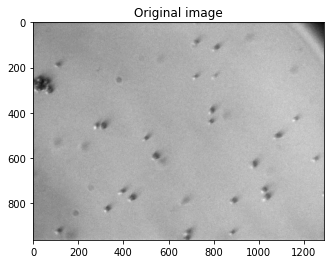

In [1]:
# The image below corresponds to a snapshot of single cell organisms observed with a microscope
import cv2
import matplotlib.pyplot as plt

!wget "https://raw.githubusercontent.com/Henry-Medeiros/images/master/organisms.jpg"
img = cv2.imread('organisms.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY, 0) 

# visualization only
plt.imshow(img, 'gray')
plt.title('Original image')
plt.show()

[]

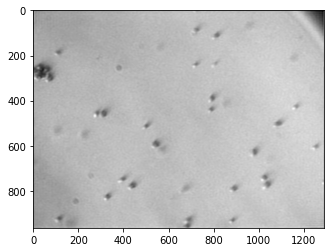

In [11]:
# Binarize the image to separate the organisms from the background
# Hint 1: You may need to remove some high-frequency noise from the image 
# before thresholding
# Hint 2: The background illumination in the image varies significantly, so a 
# single treshold for the entire will not work

#Ideal Lowpass Filter 
import numpy as np
import matplotlib.pyplot as plt

dims = img.shape
#Using different data estimates
#d0 = 50
d0 = 100
#intialize variables for convolution function
x =range(dims[1])
y =range(dims[0])
xv,yv = np.meshgrid(x,y)

#the Euclidean distance from the point(u,v) to the origin of the Fourier domain
duv = np.linalg.norm([xv-dims[1]/2,yv-dims[0]/2], axis=0)
#the convolution function for the ideal lowpass filter
ilpf_mask = duv < d0

#apply the ideal lowpass filter
#perform FFT
fft_img = np.fft.fft2(img)
#shift the Fourier frequency image
fft_img_shift = np.fft.fftshift(fft_img)
#Compute the convolution between the image and the filter in the frequency domain
filt_fft_img = fft_img_shift*ilpf_mask

recon_img = abs(np.fft.ifft2(filt_fft_img))
 
plt.imshow(recon_img,'gray')
plt.plot()

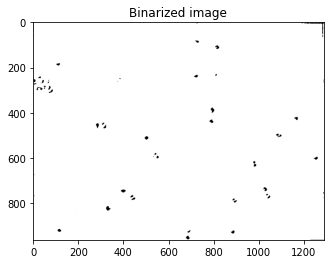

In [36]:
# do the normolization for the thresholding
recon_img = (recon_img/np.max(recon_img)*255).astype('uint8')
# Adaptive Thresholding P178
import numpy as np
from skimage.filters.thresholding import threshold_otsu
from skimage.filters import threshold_local
# Perform Adaptive Thresholding
thresh_img = cv2.adaptiveThreshold(recon_img, recon_img.max(), cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 10)

# binarized image
plt.imshow(thresh_img, 'gray')
plt.title('Binarized image')
plt.show()

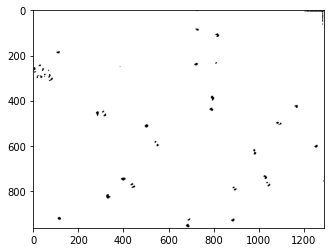

In [39]:
# Locate and plot the organisms present in the image
# Hint 3: You will need to apply a morphological filter to your binarized image 
# to remove spurious pixels left over by the binarization step
# morphological filter to close the objects
se = np.ones((3, 3), np.uint8)

img_close = cv2.morphologyEx(thresh_img, cv2.MORPH_CLOSE, se)

plt.imshow(255*img_close,'gray')
plt.show()

In [ ]:
# Count the the number of organisms present in the image and compute their 
# average area in pixels
